# Predicting Heart Disease using Machine Learning

We are going to take the following approach:
1. Problem Defination
2. Data
3. Evatuation
4. Features
5. Modelling
6. Experimentation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about data and become a subject matter export on the dataset you're working on.

1. What question(s) are you trying to solve?
2. What kind of missing data do you have and how do we treat different types?
3. What's missing form the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
# 1-->Male 0-->Female
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
# Compare target column with sex column
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


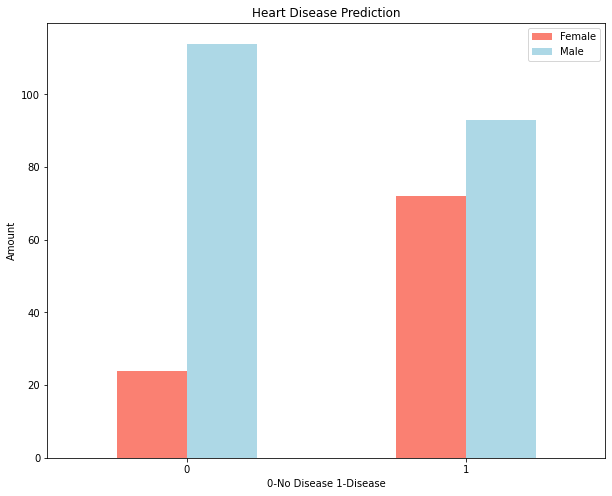

In [8]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,8),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Prediction")
plt.xlabel("0-No Disease 1-Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [9]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age vs. Max Heart Rate for Heart Disease

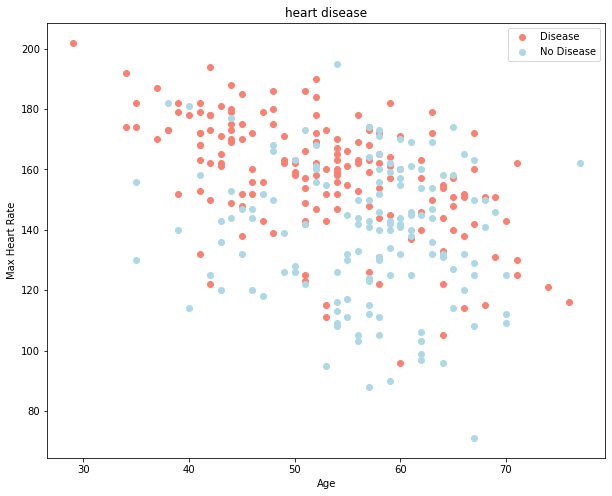

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon")
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue")

plt.title("heart disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

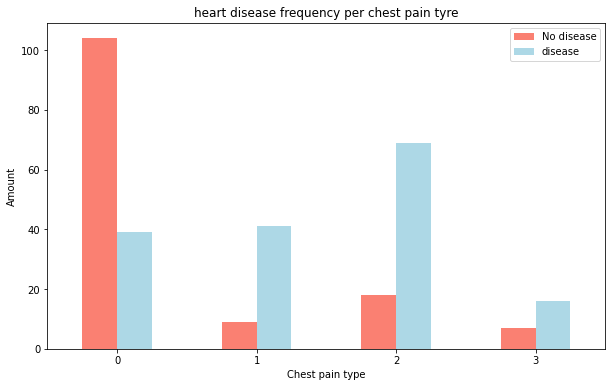

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"])
plt.title("heart disease frequency per chest pain tyre")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","disease"])
plt.xticks(rotation=0);


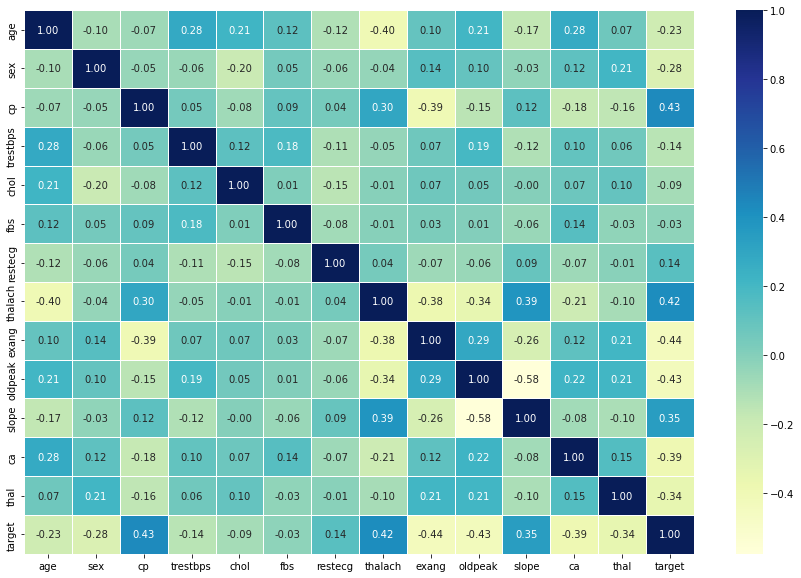

In [12]:
corr_matrics = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrics,
                annot=True,
                fmt=".2f",
                cmap="YlGnBu",
                linewidth=0.5)

In [13]:
x = df.drop("target",axis=1)
y = df["target"]
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

We are going to use three different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [14]:
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}
def fit_and_score(models,x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [15]:
model_scores = fit_and_score(models,
                            x_train,
                            x_test,
                            y_train,
                            y_test)
model_scores

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [16]:
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [17]:
models_score = fit_and_score(models,x_train,x_test,y_train,y_test)
models_score

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

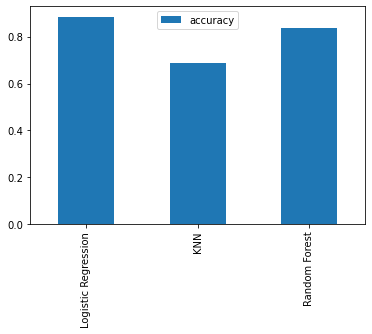

In [18]:
model_compare = pd.DataFrame(models_score,index=["accuracy"])
model_compare.T.plot.bar();


 ## Hyperparameter Tuning
 
 Let's tune KNN

In [19]:
train_scores = []
test_scores = []
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [20]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [21]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score is : 75.41%


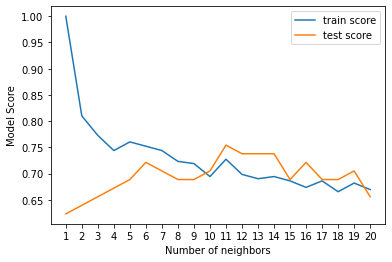

In [22]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend() 
plt.xticks(np.arange(1,21,1))
print(f"Max KNN score is : {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

In [23]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"],
               "intercept_scaling":[1,2],
               "max_iter":[200,1000]}
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,5,10],
          "max_features":["sqrt"],
          "min_samples_leaf":np.arange(1,20,2),
          "min_samples_split":np.arange(1,20,2)}

In [24]:
# Tuning LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=2)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=0.08858667904100823, intercept_scaling=2, max_iter=200, solver=liblinear; total time=   0.1s
[CV] END C=0.08858667904100823, intercept_scaling=2, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, intercept_scaling=2, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, intercept_scaling=2, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, intercept_scaling=2, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, intercept_scaling=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, intercept_scaling=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, intercept_scaling=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, intercept_scaling=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, intercept_scaling=1, max_iter=200, 

[CV] END C=206.913808111479, intercept_scaling=1, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, intercept_scaling=2, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, intercept_scaling=2, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, intercept_scaling=2, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, intercept_scaling=2, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, intercept_scaling=2, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, intercept_scaling=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, intercept_scaling=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, intercept_scaling=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, intercept_scaling=1, max_iter=200, solver=

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'intercept_scaling': [1, 2],
                                        'max_iter': [200, 1000],
                                        'solver': ['liblinear']},
                   verbose=2)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear',
 'max_iter': 1000,
 'intercept_scaling': 1,
 'C': 0.23357214690901212}

In [26]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [27]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          n_iter=40,
                          cv=5,
                          verbose=2)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=13, min_samples_split=19, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=13, min_samples_split=19, n_estimators=510; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=13, min_samples_split=19, n_es

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=960; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=960; total time=   2.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=510; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=510; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=510; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=510; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=9, n_estimators=260; total time=   0.7s
[CV] END max_depth=Non

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=210; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=210; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=210; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=210; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=710; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=710; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=710; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=710; total time=   2.0s
[CV] END max_depth=None, max_fea

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=40,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [28]:
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 15,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 5}

In [29]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [30]:
# Hyperparameter tuning using GridSearchCV
log_reg_grid = {"solver":["liblinear"],
               "C":np.logspace(-4,4,30)}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=2)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [31]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

and it would be great if cross-validation was useas where possible

In [32]:
y_preds = gs_log_reg.predict(x_test)

In [33]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


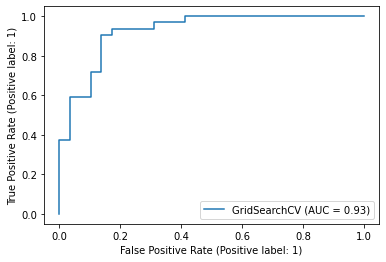

In [34]:
# Plot ROC curve and calculate AUC score
plot_roc_curve(gs_log_reg, x_test, y_test)

In [35]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


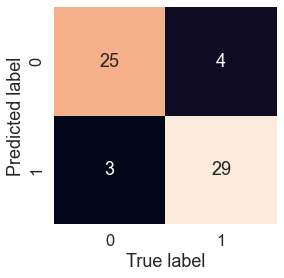

In [36]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                                     annot=True,
                                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [37]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metris using cross-validation

In [38]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [40]:
cv_acc = cross_val_score(clf,
                        x,
                        y,
                         cv=5,
                        scoring="accuracy")
cv_acc.mean()

0.8446994535519124

In [41]:
cv_precision = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring="precision")
cv_precision.mean()

0.8207936507936507

In [42]:
cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall.mean()

0.9212121212121213

In [43]:
cv_f1 = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="f1")
cv_f1.mean()

0.8673007976269721

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1')])

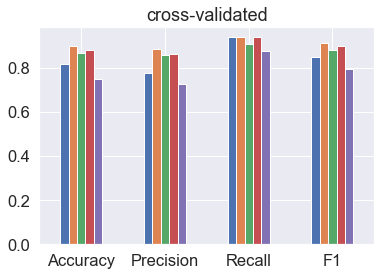

In [44]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1})
cv_metrics.T.plot.bar(title="cross-validated",
                     legend=False)
plt.xticks(rotation=0)

## Feature Importance 

In [45]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(x_train,y_train);

In [46]:
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [47]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0]))) 
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

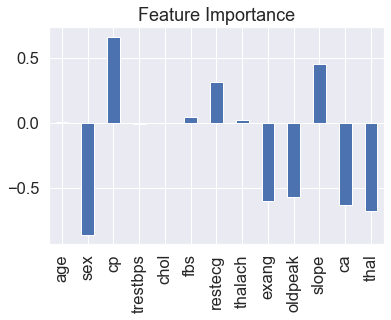

In [48]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                     legend=False);

In [49]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 163ms	remaining: 2m 43s
1:	learn: 0.6846994	total: 168ms	remaining: 1m 23s
2:	learn: 0.6804470	total: 172ms	remaining: 57.1s
3:	learn: 0.6762242	total: 175ms	remaining: 43.6s
4:	learn: 0.6716784	total: 179ms	remaining: 35.7s
5:	learn: 0.6672808	total: 183ms	remaining: 30.3s
6:	learn: 0.6639958	total: 186ms	remaining: 26.4s
7:	learn: 0.6601980	total: 190ms	remaining: 23.6s
8:	learn: 0.6563766	total: 194ms	remaining: 21.3s
9:	learn: 0.6525103	total: 197ms	remaining: 19.5s
10:	learn: 0.6483670	total: 199ms	remaining: 17.9s
11:	learn: 0.6448827	total: 202ms	remaining: 16.6s
12:	learn: 0.6412767	total: 205ms	remaining: 15.6s
13:	learn: 0.6374286	total: 208ms	remaining: 14.7s
14:	learn: 0.6335427	total: 212ms	remaining: 13.9s
15:	learn: 0.6288052	total: 215ms	remaining: 13.2s
16:	learn: 0.6250489	total: 218ms	remaining: 12.6s
17:	learn: 0.6209495	total: 221ms	remaining: 12.1s
18:	learn: 0.6181899	total: 224ms	remaining: 11.6s
19:	learn

169:	learn: 0.3486015	total: 647ms	remaining: 3.16s
170:	learn: 0.3478077	total: 650ms	remaining: 3.15s
171:	learn: 0.3464457	total: 652ms	remaining: 3.14s
172:	learn: 0.3455120	total: 654ms	remaining: 3.13s
173:	learn: 0.3446286	total: 655ms	remaining: 3.11s
174:	learn: 0.3434681	total: 657ms	remaining: 3.1s
175:	learn: 0.3430162	total: 658ms	remaining: 3.08s
176:	learn: 0.3423742	total: 661ms	remaining: 3.07s
177:	learn: 0.3422003	total: 661ms	remaining: 3.05s
178:	learn: 0.3414762	total: 663ms	remaining: 3.04s
179:	learn: 0.3401759	total: 664ms	remaining: 3.03s
180:	learn: 0.3397173	total: 666ms	remaining: 3.01s
181:	learn: 0.3388977	total: 667ms	remaining: 3s
182:	learn: 0.3379224	total: 668ms	remaining: 2.98s
183:	learn: 0.3371813	total: 670ms	remaining: 2.97s
184:	learn: 0.3368890	total: 670ms	remaining: 2.95s
185:	learn: 0.3357595	total: 672ms	remaining: 2.94s
186:	learn: 0.3350316	total: 674ms	remaining: 2.93s
187:	learn: 0.3339623	total: 675ms	remaining: 2.92s
188:	learn: 0.33

401:	learn: 0.2224446	total: 1.14s	remaining: 1.69s
402:	learn: 0.2220862	total: 1.14s	remaining: 1.69s
403:	learn: 0.2216683	total: 1.14s	remaining: 1.68s
404:	learn: 0.2212574	total: 1.14s	remaining: 1.68s
405:	learn: 0.2210520	total: 1.15s	remaining: 1.68s
406:	learn: 0.2206644	total: 1.15s	remaining: 1.67s
407:	learn: 0.2204110	total: 1.15s	remaining: 1.67s
408:	learn: 0.2199871	total: 1.15s	remaining: 1.66s
409:	learn: 0.2197389	total: 1.15s	remaining: 1.66s
410:	learn: 0.2194104	total: 1.15s	remaining: 1.65s
411:	learn: 0.2192345	total: 1.16s	remaining: 1.65s
412:	learn: 0.2189914	total: 1.16s	remaining: 1.64s
413:	learn: 0.2188487	total: 1.16s	remaining: 1.64s
414:	learn: 0.2183329	total: 1.16s	remaining: 1.63s
415:	learn: 0.2179774	total: 1.16s	remaining: 1.63s
416:	learn: 0.2174186	total: 1.16s	remaining: 1.62s
417:	learn: 0.2168941	total: 1.16s	remaining: 1.62s
418:	learn: 0.2167618	total: 1.16s	remaining: 1.61s
419:	learn: 0.2164391	total: 1.17s	remaining: 1.61s
420:	learn: 

592:	learn: 0.1704347	total: 1.6s	remaining: 1.1s
593:	learn: 0.1700939	total: 1.6s	remaining: 1.09s
594:	learn: 0.1699999	total: 1.6s	remaining: 1.09s
595:	learn: 0.1697974	total: 1.61s	remaining: 1.09s
596:	learn: 0.1696126	total: 1.61s	remaining: 1.09s
597:	learn: 0.1695729	total: 1.61s	remaining: 1.08s
598:	learn: 0.1693371	total: 1.61s	remaining: 1.08s
599:	learn: 0.1692269	total: 1.61s	remaining: 1.08s
600:	learn: 0.1691468	total: 1.61s	remaining: 1.07s
601:	learn: 0.1689636	total: 1.62s	remaining: 1.07s
602:	learn: 0.1686352	total: 1.62s	remaining: 1.07s
603:	learn: 0.1683739	total: 1.62s	remaining: 1.06s
604:	learn: 0.1681890	total: 1.62s	remaining: 1.06s
605:	learn: 0.1680077	total: 1.62s	remaining: 1.06s
606:	learn: 0.1677377	total: 1.63s	remaining: 1.05s
607:	learn: 0.1676205	total: 1.63s	remaining: 1.05s
608:	learn: 0.1675041	total: 1.63s	remaining: 1.05s
609:	learn: 0.1671551	total: 1.64s	remaining: 1.05s
610:	learn: 0.1671136	total: 1.64s	remaining: 1.04s
611:	learn: 0.16

770:	learn: 0.1372894	total: 2.1s	remaining: 624ms
771:	learn: 0.1370975	total: 2.1s	remaining: 621ms
772:	learn: 0.1369155	total: 2.1s	remaining: 618ms
773:	learn: 0.1366199	total: 2.11s	remaining: 615ms
774:	learn: 0.1364509	total: 2.11s	remaining: 612ms
775:	learn: 0.1362974	total: 2.11s	remaining: 609ms
776:	learn: 0.1362117	total: 2.11s	remaining: 606ms
777:	learn: 0.1361791	total: 2.11s	remaining: 603ms
778:	learn: 0.1359627	total: 2.11s	remaining: 600ms
779:	learn: 0.1357030	total: 2.12s	remaining: 597ms
780:	learn: 0.1355830	total: 2.12s	remaining: 594ms
781:	learn: 0.1354795	total: 2.12s	remaining: 591ms
782:	learn: 0.1353910	total: 2.12s	remaining: 588ms
783:	learn: 0.1351965	total: 2.12s	remaining: 584ms
784:	learn: 0.1350559	total: 2.12s	remaining: 581ms
785:	learn: 0.1349489	total: 2.13s	remaining: 579ms
786:	learn: 0.1349225	total: 2.13s	remaining: 576ms
787:	learn: 0.1346507	total: 2.13s	remaining: 573ms
788:	learn: 0.1345084	total: 2.13s	remaining: 570ms
789:	learn: 0.1

989:	learn: 0.1052015	total: 2.56s	remaining: 25.9ms
990:	learn: 0.1050900	total: 2.56s	remaining: 23.3ms
991:	learn: 0.1050499	total: 2.57s	remaining: 20.7ms
992:	learn: 0.1048897	total: 2.57s	remaining: 18.1ms
993:	learn: 0.1048020	total: 2.57s	remaining: 15.5ms
994:	learn: 0.1046612	total: 2.57s	remaining: 12.9ms
995:	learn: 0.1045945	total: 2.57s	remaining: 10.3ms
996:	learn: 0.1043943	total: 2.58s	remaining: 7.75ms
997:	learn: 0.1042829	total: 2.58s	remaining: 5.17ms
998:	learn: 0.1041663	total: 2.58s	remaining: 2.58ms
999:	learn: 0.1041315	total: 2.58s	remaining: 0us


0.8360655737704918

In [84]:
model = CatBoostClassifier(iterations=10,
                          learning_rate=1,
                          depth=2,
                          loss_function="MultiClass")
model.fit(x_train,y_train)
model.score(x_test,y_test)

0:	learn: 0.5486773	total: 1.69ms	remaining: 15.3ms
1:	learn: 0.4508352	total: 4.02ms	remaining: 16.1ms
2:	learn: 0.3844182	total: 6.23ms	remaining: 14.5ms
3:	learn: 0.3674593	total: 8.21ms	remaining: 12.3ms
4:	learn: 0.3537606	total: 10.1ms	remaining: 10.1ms
5:	learn: 0.3302524	total: 12.3ms	remaining: 8.19ms
6:	learn: 0.3073548	total: 14.6ms	remaining: 6.25ms
7:	learn: 0.3007611	total: 16.7ms	remaining: 4.17ms
8:	learn: 0.2867007	total: 18.9ms	remaining: 2.1ms
9:	learn: 0.2817637	total: 20.9ms	remaining: 0us


0.8852459016393442